## Reto Limpieza del Conjunto de Datos

In [152]:
# Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [153]:
# Datasets

db = pd.read_csv('Datos Originales/train.csv')
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
# Estadística descriptiva

db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualización

In [155]:
# Paleta de colores

a, b, c=[plt.cm.Blues, plt.cm.Greens, plt.cm.Reds]

##### Gráfica de supervivencia contra sexo

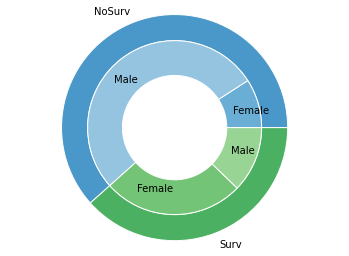

In [156]:
# Círculo externo
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(db.Survived.value_counts(), radius=1.3,
                  labels=['NoSurv', 'Surv'], colors=[a(0.6), b(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Círculo interno
mypie2, _ = ax.pie(db.groupby(['Survived','Sex'])['Sex'].count(), radius=1.3-0.3, labels=['Female','Male','Female','Male'],
                   labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

##### Gráfica de supervivencia contra clase

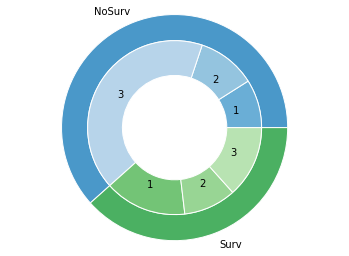

In [157]:
 # Círculo externo
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(db.Survived.value_counts(), radius=1.3,
                  labels=['NoSurv', 'Surv'], colors=[a(0.6), b(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Círculo interno
mypie2, _ = ax.pie(db.groupby(['Survived','Pclass'])['Pclass'].count(), radius=1.3-0.3, labels=['1','2','3','1','2','3'],
                   labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

##### Segmentación por Puertos de Embarcación (Embarked)

In [158]:
# Caracteristicas de los pasajeros de cada puerto

print(db['Embarked'].value_counts())

print("Valores NaN's: ", db.Embarked.isna().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
Valores NaN's:  2


Text(0.5, 1.0, 'Queenstown')

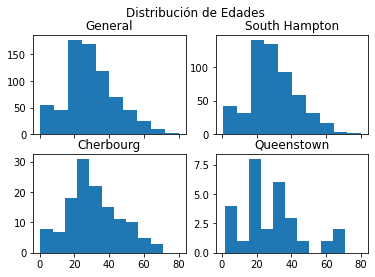

In [159]:
fig, ax = plt.subplots(2, 2, sharex='col')
fig.suptitle('Distribución de Edades')

ax[0,0].hist(db['Age'])
ax[0,0].set_title('General')
ax[1,0].hist(db[db.Embarked == 'C']['Age'])
ax[1,0].set_title('Cherbourg')
ax[0,1].hist(db[db.Embarked == 'S']['Age'])
ax[0,1].set_title('South Hampton')
ax[1,1].hist(db[db.Embarked == 'Q']['Age'])
ax[1,1].set_title('Queenstown')

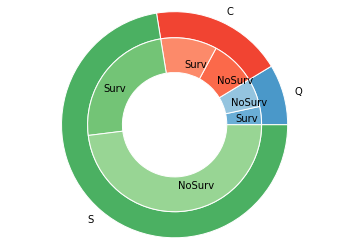

In [160]:
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# Círculo externo
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(db.Embarked.value_counts().sort_values(), radius=1.3,
                  labels=['Q','C','S'], colors=[a(0.6), b(0.6), c(0.6)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Círculo interno
mypie2, _ = ax.pie(db.groupby(['Embarked','Survived'])['Survived'].count().sort_values(), radius=1.3-0.3,
                   labels=['Surv','NoSurv','NoSurv','Surv', 'Surv','NoSurv'],
                   labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4), c(0.5), c(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

plt.show()

#### Datos interesantes

In [161]:
db[db['Fare'] == 0].Pclass.value_counts()

2    6
1    5
3    4
Name: Pclass, dtype: int64

In [162]:
db[db['Fare'] != 0].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,876.000000,707.000000,876.000000,876.000000,876.000000
mean,444.794521,0.389269,2.315068,29.645219,0.531963,0.388128,32.755650
std,257.806393,0.487863,0.835663,14.558872,1.110009,0.811374,49.936826
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,220.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,444.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,667.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Datos faltantes

In [163]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:title={'center':'Cantidad de datos faltantes'}>

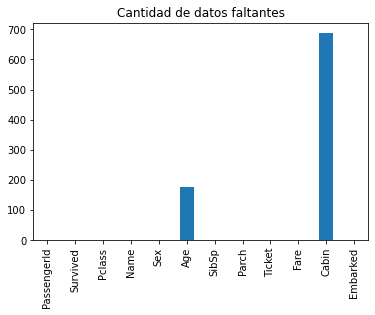

In [164]:
# Cantidad de nulos
db.isnull().sum().plot(kind = 'bar', title = 'Cantidad de datos faltantes')

### Limpieza de Datos

In [165]:
# Eliminación de columnas que no aportan información importante: Cabin, PassengerId, Ticket
db.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

# Eliminación de Valores Nulos en Embarked
db = db.dropna(axis = 0)


db.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Transformación de datos

##### Codificación de Sexo

0 - Male

1 - Female

In [166]:
db.Sex.replace(['male','female'], [0,1], inplace = True)

##### Codificación de Embarked

0 - Southampton

1 - Cherbourg

2 - Queenstown

In [167]:
db.Embarked.replace(['S','C','Q'], [0,1,2], inplace = True)

# Correlación entre Embarked y Survived
print("Correlacion entre Embarked y Survived: ", db['Embarked'].corr(db['Survived'])) # baja correlación

Correlacion entre Embarked y Survived:  0.10851682255419746


#### Obtención de títulos

In [168]:
# Función para obtener los prefijos y categorizarlos
def get_titulo(dataset):
    names=dataset["Name"]
    titulo=[]
    for name in names:
        titulo.append(re.search(',(.*?)\.',name).group(1))
    dataset["Title"]=pd.Series(titulo,index=dataset.index)
    titulo = dataset.Title.unique()
    dataset["Title"].replace(dataset.Title.unique(),np.array(range(len(dataset.Title.unique()))), inplace = True)
    return dataset, titulo

In [169]:
# Significado de codificación del título
db, titulo = get_titulo(db)
db.drop(['Name'], axis = 1, inplace = True)
pd.DataFrame(titulo,np.array(range(len(titulo))))

,0
0,Mr
1,Mrs
2,Miss
3,Master
4,Don
5,Rev
6,Dr
7,Mme
8,Ms
9,Major


### Manejo de datos faltantes (Age)

##### Exploración de la edad

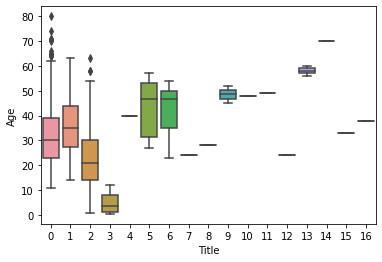

In [170]:
# Visualización de la edad respecto a los títulos

# Boxplot por cada clasificación
ax = sns.boxplot(data=db, x='Title', y='Age')

In [171]:
# Media de las edades respecto a su título y clase

age_mean = db.groupby(['Title','Pclass'])['Age'].mean().round(0)
age_mean

Title  Pclass
0      1         42.0
       2         33.0
       3         29.0
1      1         40.0
       2         34.0
       3         34.0
2      1         30.0
       2         22.0
       3         16.0
3      1          5.0
       2          2.0
       3          5.0
4      1         40.0
5      2         43.0
6      1         44.0
       2         38.0
7      1         24.0
8      2         28.0
9      1         48.0
10     1         48.0
11     1         49.0
12     1         24.0
13     1         58.0
14     1         70.0
15     1         33.0
16     1         38.0
Name: Age, dtype: float64

##### Edades faltantes

In [172]:
# Total de registros con edades faltantes respecto a su título

db[db.Age.isna()][['Title']].value_counts()

Series([], dtype: int64)

In [173]:
# Conteo de edades faltantes por su título y clase

db[db.Age.isna()].groupby(['Title','Pclass'])['Survived'].count()

Series([], Name: Survived, dtype: int64)

##### Relleno de datos faltantes

In [174]:
db['Age'] = db.apply(lambda row: age_mean.loc[row['Title']][row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [175]:
# Comprobar que se llenaron los NaN
db['Age'].isnull().sum()

0

##### Base de datos final

In [176]:
db.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


In [177]:
db.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [178]:
db.to_csv('Train_limpia.csv')